# Model: Regression 

In diesem Notebook werden verschieden Regressionsmodell angewendet, um den mittleren Immobilienpreis von Distrikten in Kalifornien vorherzusagen. Dabei ist die Anforderung an die Model einen RMSE von kleiner 70 Tsd. USD zu erzielen. Dann wird das Projekt als Erfolg gewertet. 


Die Regressionsmodelle werden in diesem Notebook mit Statsmodels und der Bibliothek scikit-learn durchgeführt. Die Auswahl der Modelle wird beim jeweiligen Modell begründet und beschrieben. Grundlegend ist jedes Modell in *Data preperation*, *Build* und *Metrics und Validation* unterteilt. Für das beste Modell der jeweiligen Bibliothek wird eine Evaluation mit den Testdaten durchgeführt. 

## Models statsmodels

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from patsy import dmatrices
from func import *

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import mse, rmse
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor

%load_ext autoreload
%autoreload 2

### Statsmodels OLS

**Data preperation**

Zur *Data preperation* bei Nutzung der Bibliothek Statsmodels werden Funktion aus der der Datei func.py verwendet. Diese werden im Notebook Data näher erläutert. 

In [2]:
df = read_data()
df = transform_data(df)
train_dataset, evaluate_dataset, train_dataset_total, test_dataset = split_data(df)
train_dataset = fill_missingdata(train_dataset)
train_dataset = add_feautures(train_dataset)
train_dataset

ValueError: not enough values to unpack (expected 4, got 2)

**Model 1 OLS: Build**

In [3]:
lm1 = smf.ols(formula ='median_house_value ~ median_income', data=train_dataset).fit()

Als erstes Modell wir eine einfach lineare Regression gewählt. Als unabhängige Variable wir *median_income* gewählt, da das mittlere Einkommen eines Bezirks die höchste Korrelation zu *median_house_value* aufweist. 

In [4]:
train_dataset['y_pred'] = lm1.predict()

**Model OLS 1: Metrics and Evaluation**

In [5]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                 1.318e+04
Date:                Tue, 18 Jan 2022   Prob (F-statistic):               0.00
Time:                        18:07:28   Log-Likelihood:            -1.8964e+05
No. Observations:               14860   AIC:                         3.793e+05
Df Residuals:                   14858   BIC:                         3.793e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.558e+04   1562.533     29.169      0.000    4.25e+04    4.86e+04
median_income  4.165e+04    362.802    114.790      0.000    4.09e+04    4.24e+04
==============================================================================
Omnibus:                     3132.062   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7037.353
Skew:                           1.205   Prob(JB):                         0.00
Kurtosis:                       5.357   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Die Kenngrößen in der summary() sind wie erwartet nicht besonders gut. Der Adj. R-squared liegt bei 0.47. Dieser besagt, dass unter 50% der Streuung der Werte durch das Modell korrekt vorhergesagt werden kann. Weitere Kenngrößen werden im Vergleich zum zweiten Modell betrachtet. 

In [6]:
r2_lm1, rmse_lm1, mse_lm1 = metrics_stats(lm1,train_dataset)

r2:  0.47
RMSE  84343.17
MSE:  7113770789.24


Ebenfalls liegt der RMSE mit 84.343 USD über dem Zielwert von 70 Tsd. USD. Das Modell kann dementsprechend nicht als Erfolg gewertet werden. 

**Model 2 OLS: Build**

In [7]:
lm2 = smf.ols(formula ='median_house_value ~ median_income + total_rooms_total_bedrooms', data=train_dataset).fit()

In [8]:
# Add the regression predictions (as "pred") to our DataFrame
train_dataset['y_pred'] = lm2.predict()

**Model 2 OLS: Metrics and Evaluate**

In [9]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     7548.
Date:                Tue, 18 Jan 2022   Prob (F-statistic):               0.00
Time:                        18:07:39   Log-Likelihood:            -1.8914e+05
No. Observations:               14860   AIC:                         3.783e+05
Df Residuals:                   14857   BIC:                         3.783e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   1.232e+05   2863.056     43.015      0.000    1.18e+05    1.29e+05
median_income               5.317e+04    503.530    105.585      0.000    5.22e+04    5.42e+04
total_rooms_total_bedrooms -2.447e+04    766.895    -31.905      0.000    -2.6e+04    -2.3e+04
==============================================================================
Omnibus:                     3447.422   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11010.460
Skew:                           1.178   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         29.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Im Vergleich zu Model 1 erreicht das Model 2 besser statistische Kenngröße. Der Adj. R-squared liegt bei ca. 3% über dem vom Model 1. Sowohl die Kenngröße der F-Statistik, wie auch AIC und BIC sind höher als bei Model 1. 

> Hinweis: Zu diesem Modell wird ausführlich Regression Diagnostics durchgeführt. 

In [10]:
r2_lm2, rmse_lm2, mse_lm2 = metrics_stats(lm2,train_dataset)

r2:  0.504
RMSE  81594.26
MSE:  6657623728.31


Der RMSE liegt mit ca. 81,6 Tsd. USD immer noch deutlich über 70 Tsd. USD. Es muss dementsprechend ein geeigneteres Modell gefunden werden. 

**Model 3 OLS: Build**

In [11]:
lm3 = smf.ols(formula ='median_house_value ~ median_income + C(ocean_proximity) + households_population + total_rooms_households +C(geohash) + housing_median_age', data=train_dataset).fit()

Im dritten Modell werden mehr Variablen aus dem ursprünglichen Datensatz berücksichtigt. Nicht miteingeschlossen werden: 
Nicht im Modell berücksichtigt werden folgende Features 
* *longitude*, *latidue* (siehe Feauture Selection)
* *total_rooms*, *total__bedrooms*, *population* und *households*, da die Korrelation dieser Merkmale untereinander zu hoch ist (siehe Feauture Selection)
* *price_category*, da diese aus *median_house_value* abgeleitet wird
* *total_rooms_total_bedrooms*, da nach einmaliger Durchführung der Klassifikation ein p-Wert von P|z|=0.555 ermittelt wurde



In [12]:
train_dataset['y_pred'] = lm3.predict()

**Model OLS 3: Metrics and Evaluation**

In [13]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     879.6
Date:                Tue, 18 Jan 2022   Prob (F-statistic):               0.00
Time:                        18:07:47   Log-Likelihood:            -1.8545e+05
No. Observations:               14860   AIC:                         3.710e+05
Df Residuals:                   14820   BIC:                         3.713e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         2.077e+04   1.11e+04      1.869      0.062   -1009.176    4.25e+04
C(ocean_proximity)[T.INLAND]     -4.735e+04   1899.713    -24.923      0.000   -5.11e+04   -4.36e+04
C(ocean_proximity)[T.ISLAND]      1.414e+05   4.63e+04      3.054      0.002    5.07e+04    2.32e+05
C(ocean_proximity)[T.NEAR BAY]   -1.633e+04   2344.659     -6.967      0.000   -2.09e+04   -1.17e+04
C(ocean_proximity)[T.NEAR OCEAN]  7776.8061   1876.598      4.144      0.000    4098.441    1.15e+04
C(geohash)[T.9mu]                -9.291e+04   1.06e+04     -8.726      0.000   -1.14e+05    -7.2e+04
C(geohash)[T.9mv]                -1.032e+05   1.21e+04     -8.550      0.000   -1.27e+05   -7.96e+04
C(geohash)[T.9my]                -1.057e+05   2.07e+04     -5.106      0.000   -1.46e+05   -6.51e+04
C(geohash)[T.9nz]                -7891.4962   6.46e+04     -0.122      0.903   -1.35e+05    1.19e+05
C(geohash)[T.9pp]                -1.768e+05   1.39e+04    -12.713      0.000   -2.04e+05    -1.5e+05
C(geohash)[T.9pr]                -1.673e+05   1.37e+04    -12.243      0.000   -1.94e+05   -1.41e+05
C(geohash)[T.9q3]                -4.218e+04   1.47e+04     -2.875      0.004   -7.09e+04   -1.34e+04
C(geohash)[T.9q4]                -5.066e+04   1.13e+04     -4.486      0.000   -7.28e+04   -2.85e+04
C(geohash)[T.9q5]                -5.132e+04   1.07e+04     -4.810      0.000   -7.22e+04   -3.04e+04
C(geohash)[T.9q6]                -8.959e+04   1.17e+04     -7.654      0.000   -1.13e+05   -6.66e+04
C(geohash)[T.9q7]                -1.138e+05   1.12e+04    -10.137      0.000   -1.36e+05   -9.18e+04
C(geohash)[T.9q8]                 6447.5693   1.09e+04      0.590      0.555    -1.5e+04    2.79e+04
C(geohash)[T.9q9]                 -6.32e+04   1.07e+04     -5.907      0.000   -8.42e+04   -4.22e+04
C(geohash)[T.9qb]                -8.704e+04   1.11e+04     -7.861      0.000   -1.09e+05   -6.53e+04
C(geohash)[T.9qc]                -1.057e+05   1.09e+04     -9.723      0.000   -1.27e+05   -8.44e+04
C(geohash)[T.9qd]                -1.113e+05   1.11e+04    -10.042      0.000   -1.33e+05   -8.95e+04
C(geohash)[T.9qe]                -1.051e+05   1.35e+04     -7.803      0.000   -1.31e+05   -7.87e+04
C(geohash)[T.9qf]                -1.017e+05   1.18e+04     -8.616      0.000   -1.25e+05   -7.86e+04
C(geohash)[T.9qg]                -1.168e+05   3.83e+04     -3.046      0.002   -1.92e+05   -4.16e+04
C(geohash)[T.9qh]                -8.209e+04   1.07e+04     -7.644      0.000   -1.03e+05    -6.1e+04
C(geohash)[T.9qj]                -1.109e+05    1.3e+04     -8.530      0.000   -1.36e+05   -8.54e+04
C(geohash)[T.9qk]                  -1.6e+05   1.69e+04     -9.475      0.000   -1.93e+05   -1.27e+05
C(geohash)[T.9qm]                 -1.34e+05   3.83e+0

In [14]:
r2_lm3, rmse_lm3, mse_lm3 = metrics_stats(lm3,train_dataset)

r2:  0.6983
RMSE  63633.85
MSE:  4049267444.27


Durch Model 3 konnte ein RMSE von 63.633 USD und damit unter der Grenze von 70 Tsd. USD erzielt werden. Erst nach Evaluation mit einem Testdatenset kann, dass Model Erfolg gewertet werden. 

### Regression Diagnostics

**Outliner and High-Leverage**

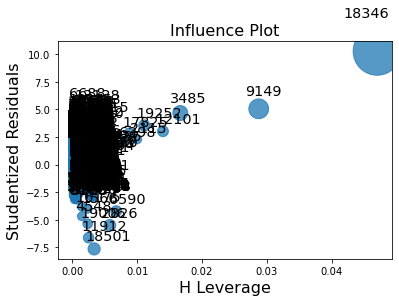

In [15]:
fig = sm.graphics.influence_plot(lm2, criterion="cooks")

In [16]:
lm_cooksd = lm2.get_influence().cooks_distance[0]
n = len(train_dataset["median_house_value"])
print('Anzahl an Datensätzen:', n)
critical_d = 4/n
print('Kritische Cook distance:', critical_d)
out_d = lm_cooksd > critical_d
print("Anzahl Datensätze mit kritischer Cooks distance:",len(lm_cooksd[out_d]))

Anzahl an Datensätzen: 14860
Kritische Cook distance: 0.00026917900403768504
Anzahl Datensätze mit kritischer Cooks distance: 914


914 Datensätzen besitzen eine kritische Cooks Distanz. Dabei handelt es sich um vermutliche outliner mit leverage. Um das einfachste Vorgehen zu wählen werden die observation entfernt. 

In [17]:
train_dataset.index[out_d]

Int64Index([ 8646, 14930, 14468, 15755,  8923,  5486, 17046,  4032, 17172,
            15195,
            ...
             2420,  8867,  3103, 15668, 15231, 15663, 14371, 11520,  4609,
            16880],
           dtype='int64', length=914)

In [18]:
train_dataset_opt = train_dataset.drop(train_dataset.index[out_d])
train_dataset_opt

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,price_category,households_population,total_rooms_households,total_rooms_total_bedrooms,geohash,y_pred
13940,-117.16,34.26,27.0,9285,1621.0,1135,410,2.5446,135200.0,INLAND,below,0.361233,22.646341,5.727946,9qh,134493.482071
14754,-117.05,32.56,17.0,985,233.0,811,223,2.8750,134500.0,NEAR OCEAN,below,0.274969,4.417040,4.227468,9mu,141379.468281
4404,-118.23,34.07,40.0,506,119.0,397,114,3.1944,143800.0,<1H OCEAN,below,0.287154,4.438596,4.252101,9q5,201806.147088
18791,-122.56,40.75,20.0,1182,250.0,512,210,1.7935,74500.0,INLAND,below,0.410156,5.628571,4.728000,9r0,67353.020912
4387,-118.26,34.08,46.0,945,250.0,910,252,3.5039,187500.0,<1H OCEAN,above,0.276923,3.750000,3.780000,9q5,212121.028562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8243,-118.18,33.78,17.0,1419,436.0,1300,360,2.0769,100000.0,NEAR OCEAN,below,0.276923,3.941667,3.254587,9q5,153816.427795
12332,-116.47,33.94,18.0,2233,471.0,919,388,3.2578,85200.0,INLAND,below,0.422198,5.755155,4.740977,9qj,131107.542754
5775,-118.27,34.16,48.0,1301,253.0,637,260,4.3438,252700.0,<1H OCEAN,above,0.408163,5.003846,5.142292,9q5,287036.707692
13740,-117.19,34.03,36.0,2223,361.0,942,331,4.6806,152400.0,INLAND,above,0.351380,6.716012,6.157895,9qh,199057.786696


**Non-linearity and heteroscedasticity**

eval_env: 1
eval_env: 1
eval_env: 1


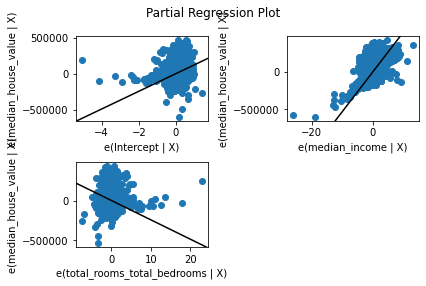

In [38]:
fig = sm.graphics.plot_partregress_grid(lm2)
fig.tight_layout(pad=1.0)

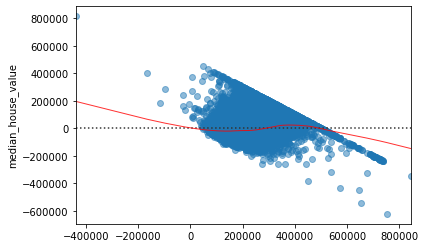

In [19]:
model_fitted_y = lm2.fittedvalues

#  Plot
plot = sns.residplot(x=model_fitted_y, y='median_house_value', data=train_dataset, lowess=True, 
                     scatter_kws={'alpha': 0.5}, 
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

* keine ungleichmäßige Verteilung der residuals: Hinweis auf Heteroscedasticity
* Vermutlich auch keine lineare Beziehung da die rote Linie sich von der gestrichelten unterscheidet

In [20]:
# Breusch-Pagan Lagrange Multiplier test

name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sm.stats.het_breuschpagan(lm2.resid, lm3.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 1718.4289650374958),
 ('p-value', 0.0),
 ('f-value', 49.68987383448796),
 ('f p-value', 0.0)]

Beide p-werte liegen deutlich unter 0.05. Daher wird die Null-Hypothese abgelehnt. 
Das deutet ist ebenfalls ein Indikator für Heteroscedasticity. Eine mögliche Lösung ist in diesem Fall die Anwendung eines Regression Splines. Dies wird in einem der folgenenden Abschnitten untersucht. 

**Non-normally distributed errors**

In [21]:
#Jarque-Bera test
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sm.stats.jarque_bera(lm2.resid)

lzip(name, test)

[('Jarque-Bera', 11010.460298680517),
 ('Chi^2 two-tail prob.', 0.0),
 ('Skew', 1.1782228218787834),
 ('Kurtosis', 6.497123439512502)]

Der p-Wert liegt bei 0.0 damit wird die Nullhyptothese abgelehnt. Das ist ein Indikator für nicht normalverteilte error terms.

In [22]:
#Omnibus normtest
name = ['Chi^2', 'Two-tail probability']
test = sm.stats.omni_normtest(lm2.resid)
lzip(name, test)

[('Chi^2', 3447.421799506371), ('Two-tail probability', 0.0)]

Auch bei diesem Test wird die Nullhyptothese abgelehnt. Das lässt ebenso auf nicht normalverteilte error terms schließen. 

Da die Anzahl an N sehr hoch ist, müssen die Fehler nicht normalverteilt sein. Grund dafür ist das Central Limit Theorem. Es werden keine weiteren Schritte unternommen. 

**Correlation of error terms**

In [23]:
# Durbin Watson test
#TODO Durbin Watson zu nah an 2?
sm.stats.durbin_watson(lm2.resid)

1.994248958147709

Der Wert liegt zwischen 1 und 2. Aus diesem Grund liegend keine Korrelation vor. 

**Collinearity**

In [24]:
#Variance inflation factor
y, X = dmatrices('median_house_value ~ median_income + total_rooms_total_bedrooms', data=train_dataset, return_type='dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Feature"] = X.columns

vif.round(2)

,VIF Factor,Feature
0,18.29,Intercept
1,2.06,median_income
2,2.06,total_rooms_total_bedrooms


Für dieses Modell liegt keine problematische collinearity in den Daten vor. 

**Model OLS 3 opt: Build**


In diesem linearen Modell wird das Modell mit multipler linearer Regression auf die bereinigten Trainingsdaten nach der Regression Diagnostics angewendet. 


In [34]:
lm3opt = smf.ols(formula ='median_house_value ~ median_income + C(ocean_proximity) + households_population + total_rooms_households +C(geohash) + housing_median_age', data=train_dataset_opt).fit()

In [35]:
train_dataset_opt['y_pred'] = lm3opt.predict()

**Model OLS 3 opt: Metrics and Evaluation**

In [36]:
lm3opt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     1118.
Date:                Tue, 18 Jan 2022   Prob (F-statistic):               0.00
Time:                        18:19:01   Log-Likelihood:            -1.7063e+05
No. Observations:               13946   AIC:                         3.413e+05
Df Residuals:                   13907   BIC:                         3.416e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         2.698e+04   9482.180      2.846      0.004    8396.774    4.56e+04
C(ocean_proximity)[T.INLAND]     -4.292e+04   1519.682    -28.246      0.000   -4.59e+04   -3.99e+04
C(ocean_proximity)[T.ISLAND]     -1.734e-08   5.06e-09     -3.430      0.001   -2.72e-08   -7.43e-09
C(ocean_proximity)[T.NEAR BAY]   -1.534e+04   1893.174     -8.100      0.000    -1.9e+04   -1.16e+04
C(ocean_proximity)[T.NEAR OCEAN]  1.194e+04   1543.060      7.735      0.000    8911.029     1.5e+04
C(geohash)[T.9mu]                -8.401e+04   9096.897     -9.236      0.000   -1.02e+05   -6.62e+04
C(geohash)[T.9mv]                -8.419e+04   1.02e+04     -8.281      0.000   -1.04e+05   -6.43e+04
C(geohash)[T.9my]                -9.721e+04   1.83e+04     -5.323      0.000   -1.33e+05   -6.14e+04
C(geohash)[T.9nz]                 1.989e+04   5.07e+04      0.392      0.695   -7.96e+04    1.19e+05
C(geohash)[T.9pp]                -1.513e+05   1.15e+04    -13.128      0.000   -1.74e+05   -1.29e+05
C(geohash)[T.9pr]                -1.441e+05   1.13e+04    -12.756      0.000   -1.66e+05   -1.22e+05
C(geohash)[T.9q3]                -4.049e+04   1.24e+04     -3.255      0.001   -6.49e+04   -1.61e+04
C(geohash)[T.9q4]                  -4.8e+04   9604.290     -4.998      0.000   -6.68e+04   -2.92e+04
C(geohash)[T.9q5]                -4.445e+04   9113.729     -4.877      0.000   -6.23e+04   -2.66e+04
C(geohash)[T.9q6]                -7.613e+04   9874.677     -7.710      0.000   -9.55e+04   -5.68e+04
C(geohash)[T.9q7]                -9.598e+04   9516.418    -10.086      0.000   -1.15e+05   -7.73e+04
C(geohash)[T.9q8]                 2419.1560   9341.024      0.259      0.796   -1.59e+04    2.07e+04
C(geohash)[T.9q9]                -5.011e+04   9137.183     -5.484      0.000    -6.8e+04   -3.22e+04
C(geohash)[T.9qb]                -6.596e+04   9409.414     -7.010      0.000   -8.44e+04   -4.75e+04
C(geohash)[T.9qc]                -8.729e+04   9261.870     -9.424      0.000   -1.05e+05   -6.91e+04
C(geohash)[T.9qd]                -9.338e+04   9417.538     -9.915      0.000   -1.12e+05   -7.49e+04
C(geohash)[T.9qe]                -8.036e+04   1.13e+04     -7.119      0.000   -1.02e+05   -5.82e+04
C(geohash)[T.9qf]                -7.704e+04   9959.052     -7.736      0.000   -9.66e+04   -5.75e+04
C(geohash)[T.9qg]                -9.159e+04   3.02e+04     -3.028      0.002   -1.51e+05   -3.23e+04
C(geohash)[T.9qh]                -6.947e+04   9163.446     -7.581      0.000   -8.74e+04   -5.15e+04
C(geohash)[T.9qj]                -9.081e+04   1.09e+04     -8.330      0.000   -1.12e+05   -6.94e+04
C(geohash)[T.9qk]                -1.503e+05   1.47e+04    -10.237      0.000   -1.79e+05   -1.21e+05
C(geohash)[T.9qm]                -1.201e+05   3.02e+0

In [37]:
r2_lm3opt, rmse_lm3opt, mse_lm3opt = metrics_stats(lm3opt,train_dataset_opt)

r2:  0.7534
RMSE  49832.42
MSE:  2483270183.72


Für dieses Modell liegt der RMSE unter 50 Tsd. USD.  Wird nur diese Größe betrachtet handelt es hierbei um das beste Modell. 

### Statsmodel Lasso

**Model Lasso: Build**

Folgendes Modell basiert auf eine Recherche im Internet zur Anwendung von Lasso mit der Bibliothek Statsmodels. Mit dem Parameter `L1_wt` wird eine regularisiertes Modell nach Lasso umgesetzt. Zu dieser Umsetzung habe ich wenige Quelle gefunden. 

In [38]:
lmlasso = smf.ols(formula ='median_house_value ~ median_income + C(ocean_proximity) + households_population + total_rooms_households + total_rooms_total_bedrooms+C(geohash)', data=train_dataset).fit_regularized(L1_wt=1)

In [39]:
train_dataset['y_pred'] = lmlasso.predict()

**Model Lasso: Metrics and Evaluation**

In [40]:
rmse_lasso= round(rmse(train_dataset['median_house_value'], train_dataset['y_pred']), 2)
mse_lasso = round (mse(train_dataset['median_house_value'], train_dataset['y_pred']), 2)
print("RMSE ",rmse_lasso)
print("MSE: ",mse_lasso)


RMSE  66702.33
MSE:  4449200441.47


Der RMSE liegt mit ca. 66,7 Tsd. USD unter 70 Tsd. USD. 

### Natural Spline Statsmodel

**Model Splines: Build**

Das Natural Splines Modell wir mit nur einer Variablen umgesetzt. Da *median_income* die höchste Korrelation  mit *median_house_value* aufweist wird dieser in das Modell einbezogen. 

In [48]:
X_train = train_dataset['median_income']
y_train = train_dataset['median_house_value']

In [50]:
from patsy import dmatrix
transformed_x3 = dmatrix("cr(train,df = 3)", {"train": X_train}, return_type='dataframe')

In [51]:
spline = sm.GLM(y_train, transformed_x3).fit()

In [44]:
y_pred= spline.predict(dmatrix("cr(train, df=3)", {"train": X_train}, return_type='dataframe'))

**Model Splines: Metrics and Evaluation**

In [45]:
spline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     median_house_value   No. Observations:                14860
Model:                            GLM   Df Residuals:                    14857
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                      7.0656e+09
Method:                          IRLS   Log-Likelihood:            -1.8959e+05
Date:                Tue, 18 Jan 2022   Deviance:                   1.0497e+14
Time:                        18:28:18   Pearson chi2:                 1.05e+14
No. Iterations:                     3   Pseudo R-squ. (CS):             0.5934
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.133e+05   2195.333     97.149      0.000    2.09e+05    2.18e+05
cr(train, df=3)[0] -1.642e+05   1937.784    -84.722      0.000   -1.68e+05    -1.6e+05
cr(train, df=3)[1] -1.091e+04   2475.528     -4.407      0.000   -1.58e+04   -6056.668
cr(train, df=3)[2]  3.884e+05   5768.188     67.327      0.000    3.77e+05       4e+05
======================================================================================
"""

In [46]:
rmse_spline= round(rmse(train_dataset['median_house_value'], y_pred), 2)
mse_spline = round (mse(train_dataset['median_house_value'], y_pred), 2)
print("RMSE ",rmse_spline)
print("MSE: ",mse_spline)

RMSE  84048.48
MSE:  7064147575.14


Da ein Ergebnis der Regression Diagnostic ist, dass Spline für diese Problem besser geeignet sind, entspricht das Ergebnis nicht den Erwartungen. Grund kann dafür das Einbeziehen nur einer Variable sein. 

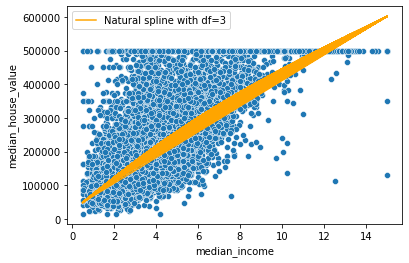

In [47]:
sns.scatterplot(x=X_train, y=y_train)
plt.plot(X_train, y_pred, color='orange', label='Natural spline with df=3')
plt.legend()

### Evaluation

Für die Evaluation werden die RMSE der einzelnen Modelle miteinander verglichen. Das Modell mit dem niedrigsten RMSE wird mit den Testdaten validiert. 

In [52]:
results= {'RMSE': ['RMSE OLS 1', 'RMSE OLS 2', 'RMSE OLS 3', 'RMSE OLS 3 opt', 'RMSE Lasso', 'RMSE Spline'],
        'Werte': [rmse_lm1, rmse_lm2, rmse_lm3, rmse_lm3opt, rmse_lasso, rmse_spline] }
df_results = pd.DataFrame(results)
df_results.sort_values(by ='Werte')

,RMSE,Werte
3,RMSE OLS 3 opt,49832.42
2,RMSE OLS 3,63633.85
4,RMSE Lasso,66702.33
1,RMSE OLS 2,81594.26
5,RMSE Spline,84048.48
0,RMSE OLS 1,84343.17


In [74]:
test_dataset = add_feautures(test_dataset)
test_dataset = fill_missingdata(test_dataset)

In [73]:
test_dataset['y_pred'] = lm3opt.predict(test_dataset[['median_income', 'ocean_proximity', 'households_population', 'total_rooms_households', 'housing_median_age', 'geohash']])

In [72]:
r2_test, rmse_test, mse_test = metrics_stats(lm3opt,test_dataset)

r2:  0.7534
RMSE  63049.64
MSE:  3975256654.45


In einem realen Umfeld wäre nach Erstellung des Modells eine vollständige Regression Diagnostics notwendig gewesen, um das Ergebnis richtig einordnen zu können. 

## Model sklearn

In [53]:
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LassoCV, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

import seaborn as sns  


from func import *
from sklearn import set_config

%load_ext autoreload
%autoreload 2
set_config(display="diagram")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### sklearn OLS

**Data Preperation**

Zur Datenvorbereitung  mit der Bibliothek scikit-learn wird ein *preprocessor* angewendet. Der Aufbau des *preprocessors* ist im Notebook Data genauer beschrieben. In diesem Fall wird dieser über die Funktion erstellt. 

In [55]:
df = read_data()
df = transform_data(df)

In [56]:
#Split Test and Trainingsdata
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [57]:
X_train = add_feautures(X_train)

In [58]:
#Feauture Selection 
X_train = X_train[['median_income', 'ocean_proximity','housing_median_age', 'households_population', 'total_rooms_households', 'total_rooms_total_bedrooms', 'geohash']]
X_train

,median_income,ocean_proximity,housing_median_age,households_population,total_rooms_households,total_rooms_total_bedrooms,geohash
14196,3.2596,NEAR OCEAN,33.0,0.270870,5.017657,4.985646,9mu
8267,3.8125,NEAR OCEAN,49.0,0.575342,4.473545,4.297332,9q5
17445,4.1563,NEAR OCEAN,4.0,0.367213,5.645833,5.731118,9q4
14265,1.9425,NEAR OCEAN,36.0,0.250353,4.002817,3.871935,9mu
2271,3.5542,INLAND,43.0,0.434783,6.268421,5.526682,9qd
...,...,...,...,...,...,...,...
11284,6.3700,<1H OCEAN,35.0,0.329787,6.129032,6.616915,9qh
11964,3.0500,INLAND,33.0,0.256132,6.868597,5.410526,9qh
5390,2.9344,<1H OCEAN,36.0,0.300114,3.986717,3.692443,9q5
860,5.7192,<1H OCEAN,15.0,0.314575,6.395349,5.988275,9q9


In [59]:
preprocessor = build_preprocessor()

**Model OLS**

Das erste Modell, welches mit scikit-learn umsgesetzt wird, basiert ebenfalls auf der *Ordinary least squares*-Methode. Im Unterschied zu Statsmodel wird mit scikit-learn gleich eine Multiple-Regression durchgeführt, da diese deutlich bessere Ergebnisse erzielen konnte. 

In [60]:
lm_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lm', LinearRegression())
                        ])

In [61]:
lm_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000023437C3C608>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(dtype=<class 'int'>,
                                                                                 handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000023437C3C188>)])),
                ('lm', LinearRegression())])

In [62]:
y_pred = lm_pipe.predict(X_train)

**Metrcis and Evaluation**

In [63]:
r2_lm, rmse_lm, mse_lm = metrics_sk(y_train, y_pred)

r2:  0.7008
RMSE  63242.32
MSE:  3999591280.22


Durch die Wahl geeignter Variablen wird gleich zu Beginn ein Model mit einem RMSE unter 70 Tsd. USD erzielt. 

In [161]:
#TODO
#sns.residplot(x=y_pred, y=y_train, scatter_kws={"s": 80})

### sklearn Lasso

**Data preperation**

In [64]:
df = read_data()
df = transform_data(df)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,price_category
0,-122.23,37.88,NaN,880,129.0,322,126,8.3252,NaN,NEAR BAY,below
1,-122.22,37.86,21.0,7099,1106.0,2401,1138,8.3014,358500.0,NEAR BAY,above
2,-122.24,37.85,52.0,1467,190.0,496,177,7.2574,352100.0,NEAR BAY,above
3,-122.25,37.85,52.0,1274,235.0,558,219,5.6431,341300.0,NEAR BAY,above
4,-122.25,37.85,52.0,1627,280.0,565,259,3.8462,342200.0,NEAR BAY,above
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665,374.0,845,330,1.5603,78100.0,INLAND,below
20636,-121.21,39.49,18.0,697,150.0,356,114,2.5568,77100.0,INLAND,below
20637,-121.22,39.43,17.0,2254,485.0,1007,433,1.7000,92300.0,INLAND,below
20638,-121.32,39.43,18.0,1860,409.0,741,349,1.8672,84700.0,INLAND,below


In [71]:
#Split Test and Trainingsdata
X = df.drop(columns = ['median_house_value', 'price_category'], axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [72]:
X_train = add_feautures(X_train)

In [73]:
preprocessor = build_preprocessor()

Bei der Vorbereitung der Daten für das Lasso-Modell werden keine weiteren Variablen ausgeschlossen, da das Model eine Feauture Selection durchführt. 

**Model LassoCV: Build**

Zur Bestimmung des optimalen Hyperparameters wird hier eine Lasso Cross Validation angewendet. Dafür werden die Trainingsdaten in 5 Teilsets aufgeteilt. 

In [74]:
LassoCV_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('LassoCV', LassoCV(cv=5, random_state=0, max_iter=10000))
                        ])

In [85]:
LassoCV_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000023437CA2888>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(dtype=<class 'int'>,
                                                                                 handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000023437CA2848>)])),
                ('LassoCV', LassoCV(cv=5, max_iter=10000, random_state=0))])

In [76]:
y_pred = LassoCV_pipe.predict(X_train)

**Model LassoCV: Metrics and Evaluation**

In [80]:
r2_lasso, rmse_lasso, mse_lasso = metrics_sk(y_train, y_pred)

r2:  0.7046
RMSE  62842.13
MSE:  3949133062.48


In [81]:
alpha = LassoCV_pipe.named_steps['LassoCV'].alpha_
alpha

79.85195644260375

Durch Auslesen des Attributs `alpha_` wird der am besten geeignte Hyperparameter ausgewählt. Dieser wird im folgenden auf die Lasso-Regression angewendet. 

**Model Lasso Best Alpha: Build**

In [82]:
Lasso_alpha_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('Lasso', Lasso(alpha=alpha))
                        ])

In [83]:
Lasso_alpha_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000023437CA2888>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(dtype=<class 'int'>,
                                                                                 handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000023437CA2848>)])),
                ('Lasso', Lasso(alpha=79.85195644260375))])

**Model Lasso Best Alpha: Metrics**

In [84]:
r2_lasso, rmse_lasso, mse_lasso = metrics_sk(y_train, y_pred)

r2:  0.7046
RMSE  62842.13
MSE:  3949133062.48


Der RMSE liegt unter 70 Tsd. USd. und entspricht demententsprechend den Anforderung an das Modell. 

### sklearn Spline

**Data preperation**

In [235]:
df = read_data()
df = transform_data(df)

In [275]:
#Split Test and Trainingsdata
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [237]:
X_train = add_feautures(X_train)

In [238]:
#Feauture Selection 
X_train = X_train[['median_income', 'ocean_proximity','housing_median_age', 'households_population', 'total_rooms_households', 'total_rooms_total_bedrooms', 'geohash']]

In [239]:
preprocessor = build_preprocessor()

**Splines: Build**

In [240]:
Splines_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('polynomialfeatures', PolynomialFeatures()),
    ('ridge', Ridge())
                        ])

In [242]:
Splines_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000271208E7308>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(dtype=<class 'int'>,
                                                                                 handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000271208E7348>)])),
                ('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge())])

In [244]:
y_pred = Splines_pipe.predict(X_train)

In [281]:
r2_spline, rmse_spline, mse_spline = metrics_sk(y_train, y_pred)

r2:  0.7628
RMSE  56311.61
MSE:  3170997160.3


In [147]:
#TODO Graph?#TODO Frage Scipy statt sklearn
#from scipy.interpolate import CubicSpline
#natural_spline = CubicSpline(x, y, bc_type='natural')

### Evaluation Sklearn

**Select best model**

In [262]:
results= {'RMSE': ['RMSE OLS', 'RMSE Lasso', 'RMSE Spline'],
        'Werte': [rmse_lm, rmse_lasso, rmse_spline] }
df_results = pd.DataFrame(results)
df_results.sort_values(by ='Werte')

,RMSE,Werte
2,RMSE Spline,56311.61
1,RMSE Lasso,57838.12
0,RMSE OLS,63242.32


**Predict with test data**

In [282]:
X_test = add_feautures(X_test)
X_test = X_test[['median_income', 'ocean_proximity','housing_median_age', 'households_population', 'total_rooms_households', 'total_rooms_total_bedrooms', 'geohash']]

In [285]:
y_test_pred = Splines_pipe.predict(X_test)

**Final Results**

In [286]:
y_test.fillna(y_test.median(), inplace= True)
r2_test, rmse_test, mse_test = metrics_sk(y_test, y_test_pred)


r2:  0.7366
RMSE  58720.25
MSE:  3448068054.55
